# **SÉRIES TEMPORAIS EM FINANÇAS - Modelos de Predição**

## PROPHET

Modelo de Previsão de séries temporais produzido pelo facebook na época.

1. Modelo Aditivo
2. Componentes Principais
  * Tendência
  * Sazonalidade
  * Feriados
  * Regressores personalizados (adição pelo usuário para levar em consideração características específicas dos dados)
3. Componente de Incerteza - Estimativa
4. Tratamento de Outliers
5. Ajuste Automático de Parâmetros
6. Rápido Tempo de Treinamento


### Importando a base de dados

In [ ]:
import yfinance as yf

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [ ]:
# símbolos das empresas e intervalo de datas
symbols = ['MSFT', 'GOOGL', 'TSLA', 'AMZN', 'AAPL', 'META', 'NVDA']
start_date = '2015-01-01'
end_date = '2023-11-30'

data = yf.download(symbols, start=start_date, end=end_date)

[*********************100%%**********************]  7 of 7 completed


In [ ]:
# reindexação
data.reset_index(inplace=True)

## Funções de Erro (MRE, MSRE e MAE)

In [ ]:
def MSE(real, predict):
  aux=0
  for i, j in zip(real,predict):
    if i != -1:
      aux += pow(i-j,2)
  return aux/len(real)

def MAE(real, predict):
  aux=0
  for i, j in zip(real,predict):
    if i != -1:
      aux += abs(i-j)
  return aux/len(real)

def MSRE(real, predict):
  return pow(MSE(real, predict), 0.5)

### Separando Adj Close do Dataframe

In [ ]:
columns_to_select = data.columns.get_level_values(0).isin(['Adj Close', 'Date'])
data_adj_close_and_date = data.loc[:, columns_to_select]


### Separando em Train e Test

In [ ]:
# Dataframe para comparar com a previsão
test = data_adj_close_and_date[data_adj_close_and_date['Date'] > '2023-10-31'] #Test
data_adj_close_and_date = data_adj_close_and_date[data_adj_close_and_date['Date'] <= '2023-10-31'] #Train

### Ajustando o dataset de Teste para comportar um mês inteiro no range do índice

In [ ]:
import pandas as pd
test_examination = test.copy()
test_examination = test_examination.set_index('Date')
complete_period = pd.date_range(start='2023-11-01', end='2023-11-29')
test_examination = test_examination.reindex(complete_period, fill_value=-1)
test_examination

Price        Adj Close                                                  \
Ticker            AAPL        AMZN       GOOGL        META        MSFT   
2023-11-01  173.741104  137.000000  126.449997  311.850006  345.369019   
2023-11-02  177.336380  138.070007  127.489998  310.869995  347.614471   
2023-11-03  176.417572  138.600006  129.100006  314.600006  352.085388   
2023-11-04   -1.000000   -1.000000   -1.000000   -1.000000   -1.000000   
2023-11-05   -1.000000   -1.000000   -1.000000   -1.000000   -1.000000   
2023-11-06  178.994186  139.740005  130.250000  315.799988  355.807831   
2023-11-07  181.580780  142.710007  130.970001  318.820007  359.799744   
2023-11-08  182.649368  142.080002  131.839996  319.779999  362.464325   
2023-11-09  182.169998  140.600006  130.240005  320.549988  359.959412   
2023-11-10  186.399994  143.559998  132.589996  328.769989  368.921234   
2023-11-11   -1.000000   -1.000000   -1.000000   -1.000000   -1.000000   
2023-11-12   -1.000000   -1.000000   -1.000000   -1.000000   -1.000000   
2023-11-13  184.800003  142.589996  132.089996  329.190002  365.937256   
2023-11-14  187.440002  145.800003  133.619995  336.309998  369.519989   
2023-11-15  188.009995  143.199997  134.619995  332.709991  369.670013   
2023-11-16  189.710007  142.830002  136.929993  334.190002  376.170013   
2023-11-17  189.690002  145.179993  135.309998  335.040009  369.850006   
2023-11-18   -1.000000   -1.000000   -1.000000   -1.000000   -1.000000   
2023-11-19   -1.000000   -1.000000   -1.000000   -1.000000   -1.000000   
2023-11-20  191.449997  146.130005  136.250000  339.970001  377.440002   
2023-11-21  190.639999  143.899994  136.970001  336.980011  373.070007   
2023-11-22  191.309998  146.710007  138.490005  341.489990  377.850006   
2023-11-23   -1.000000   -1.000000   -1.000000   -1.000000   -1.000000   
2023-11-24  189.970001  146.740005  136.690002  338.230011  377.429993   
2023-11-25   -1.000000   -1.000000   -1.000000   -1.000000   -1.000000   
2023-11-26   -1.000000   -1.000000   -1.000000   -1.000000   -1.000000   
2023-11-27  189.789993  147.729996  136.410004  334.700012  378.609985   
2023-11-28  190.399994  147.029999  137.199997  338.989990  382.700012   
2023-11-29  189.369995  146.320007  134.990005  332.200012  378.850006   

Price                               
Ticker            NVDA        TSLA  
2023-11-01  423.212799  205.660004  
2023-11-02  435.021759  218.509995  
2023-11-03  450.010406  219.960007  
2023-11-04   -1.000000   -1.000000  
2023-11-05   -1.000000   -1.000000  
2023-11-06  457.469788  219.270004  
2023-11-07  459.509583  222.179993  
2023-11-08  465.699036  222.110001  
2023-11-09  469.458710  209.979996  
2023-11-10  483.307526  214.649994  
2023-11-11   -1.000000   -1.000000  
2023-11-12   -1.000000   -1.000000  
2023-11-13  486.157257  223.710007  
2023-11-14  496.516327  237.410004  
2023-11-15  488.837036  242.839996  
2023-11-16  494.756500  233.589996  
2023-11-17  492.936676  234.300003  
2023-11-18   -1.000000   -1.000000  
2023-11-19   -1.000000   -1.000000  
2023-11-20  504.045685  235.600006  
2023-11-21  499.396088  241.199997  
2023-11-22  487.117188  234.210007  
2023-11-23   -1.000000   -1.000000  
2023-11-24  477.718018  235.449997  
2023-11-25   -1.000000   -1.000000  
2023-11-26   -1.000000   -1.000000  
2023-11-27  482.377594  236.080002  
2023-11-28  478.167938  246.720001  
2023-11-29  481.357666  244.139999

In [ ]:
data_adj_close_and_date.head()

Price        Date  Adj Close                                            \
Ticker                  AAPL     AMZN      GOOGL       META       MSFT   
0      2015-01-02  24.466452  15.4260  26.477501  78.449997  40.452744   
1      2015-01-05  23.777193  15.1095  25.973000  77.190002  40.080742   
2      2015-01-06  23.779427  14.7645  25.332001  76.150002  39.492466   
3      2015-01-07  24.112869  14.9210  25.257500  76.150002  39.994236   
4      2015-01-08  25.039335  15.0230  25.345501  78.180000  41.170784   

Price                        
Ticker      NVDA       TSLA  
0       4.832806  14.620667  
1       4.751178  14.006000  
2       4.607132  14.085333  
3       4.595127  14.063333  
4       4.767984  14.041333

In [ ]:
date_column = data_adj_close_and_date['Date']
print(date_column)

0      2015-01-02
1      2015-01-05
2      2015-01-06
3      2015-01-07
4      2015-01-08
          ...    
2218   2023-10-25
2219   2023-10-26
2220   2023-10-27
2221   2023-10-30
2222   2023-10-31
Name: Date, Length: 2223, dtype: datetime64[ns]


Pegando a ação da apple como teste :

In [ ]:
aapl_adj_close = data_adj_close_and_date['Adj Close']['AAPL']
aapl_adj_close.head()

0    24.466452
1    23.777193
2    23.779427
3    24.112869
4    25.039335
Name: AAPL, dtype: float64

#### Considerações importantes :

- O prophet via de regra é uma biblioteca desenvolvida para análises univariadas . Em um primeiro momento iremos aplicar o mesmo método para todas as ações do dataset e depois vamos tentar fazer com que rode para análise multivariada .

#### 1 - Analise Univariada


In [ ]:
!pip install prophet

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data_adj_close_and_date.dtypes

Price      Ticker
Date                 datetime64[ns]
Adj Close  AAPL             float64
           AMZN             float64
           GOOGL            float64
           META             float64
           MSFT             float64
           NVDA             float64
           TSLA             float64
dtype: object

In [ ]:
data_adj_close_and_date['ds'] = data_adj_close_and_date['Date']
data_adj_close_and_date = data_adj_close_and_date.drop(columns=['Date'])

<ipython-input-14-2e2b4d45cf77>:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  data_adj_close_and_date = data_adj_close_and_date.drop(columns=['Date'])


In [ ]:
data_adj_close_and_date['y'] = data_adj_close_and_date['Adj Close']['AAPL']
data_adj_close_and_date['y_AMZN'] = data_adj_close_and_date['Adj Close']['AMZN']
data_adj_close_and_date['y_GOOGL'] = data_adj_close_and_date['Adj Close']['GOOGL']
data_adj_close_and_date['y_META'] = data_adj_close_and_date['Adj Close']['META']
data_adj_close_and_date['y_MSFT'] = data_adj_close_and_date['Adj Close']['MSFT']
data_adj_close_and_date['y_NVDA'] = data_adj_close_and_date['Adj Close']['NVDA']
data_adj_close_and_date['y_TSLA'] = data_adj_close_and_date['Adj Close']['TSLA']
# Drop as colunas antigas
data_adj_close_and_date = data_adj_close_and_date.drop(columns=['Adj Close'])

In [ ]:
data_adj_close_and_date

Price,ds,y,y_AMZN,y_GOOGL,y_META,y_MSFT,y_NVDA,y_TSLA
Ticker,,,,,,,,
0,2015-01-02,24.466452,15.426000,26.477501,78.449997,40.452744,4.832806,14.620667
1,2015-01-05,23.777193,15.109500,25.973000,77.190002,40.080742,4.751178,14.006000
2,2015-01-06,23.779427,14.764500,25.332001,76.150002,39.492466,4.607132,14.085333
3,2015-01-07,24.112869,14.921000,25.257500,76.150002,39.994236,4.595127,14.063333
4,2015-01-08,25.039335,15.023000,25.345501,78.180000,41.170784,4.767984,14.041333
...,...,...,...,...,...,...,...,...
2218,2023-10-25,170.874893,121.389999,125.610001,299.529999,339.979980,417.753265,212.419998
2219,2023-10-26,166.670425,119.570000,122.279999,288.350006,327.225861,403.224548,205.759995
2220,2023-10-27,167.998672,127.739998,122.169998,296.730011,329.141968,404.964386,207.300003


#### - APPLE

In [ ]:
from prophet import Prophet

model_AAPL = Prophet()
model_AAPL.add_seasonality(name='daily', period=1, fourier_order=1)  # Adicione sazonalidade diária se necessário
model_AAPL.fit(data_adj_close_and_date[['ds', 'y']])




INFO:prophet:Found custom seasonality named 'daily', disabling built-in 'daily' seasonality.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf0ccrzj5/eb_yse2q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf0ccrzj5/yx6kw4c6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73323', 'data', 'file=/tmp/tmpf0ccrzj5/eb_yse2q.json', 'init=/tmp/tmpf0ccrzj5/yx6kw4c6.json', 'output', 'file=/tmp/tmpf0ccrzj5/prophet_modelmrbcogcs/prophet_model-20240129205617.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:56:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:56:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


- Fazendo a previsão para 30 dias

In [ ]:
future = model_AAPL.make_future_dataframe(periods=30)
future.tail()

,ds
2248,2023-11-26
2249,2023-11-27
2250,2023-11-28
2251,2023-11-29
2252,2023-11-30


- Realizando a previsão

In [ ]:
forecast = model_AAPL.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2248,2023-11-26,169.526397,159.103244,179.923931
2249,2023-11-27,171.101894,160.852587,181.419455
2250,2023-11-28,171.008807,160.394656,181.784515
2251,2023-11-29,171.106082,160.534524,181.783484
2252,2023-11-30,171.067774,161.123365,182.309264


- Plotando o gráfico com as previsões

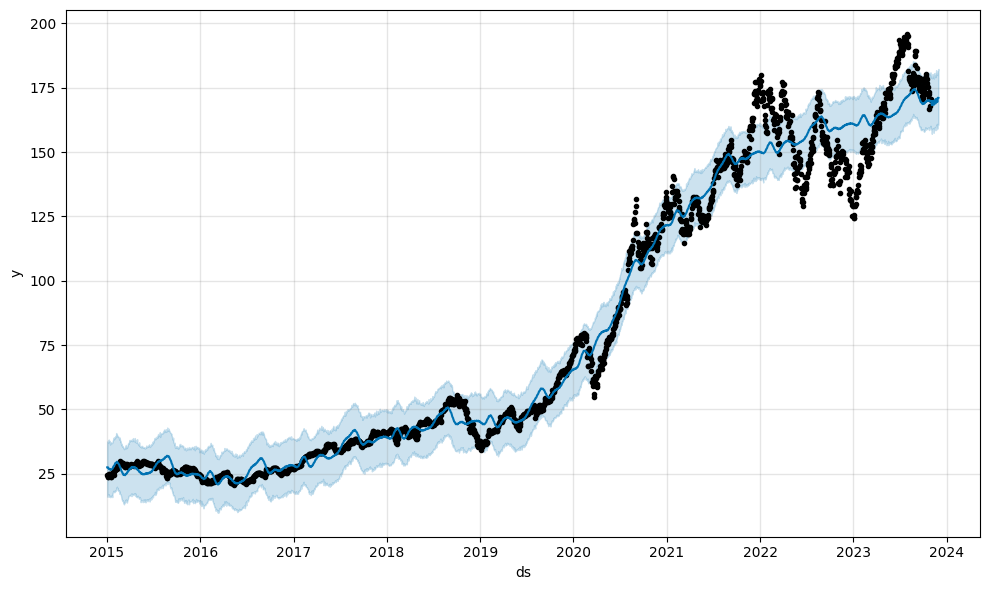

In [ ]:
fig = model_AAPL.plot(forecast)

- Plotando os componentes

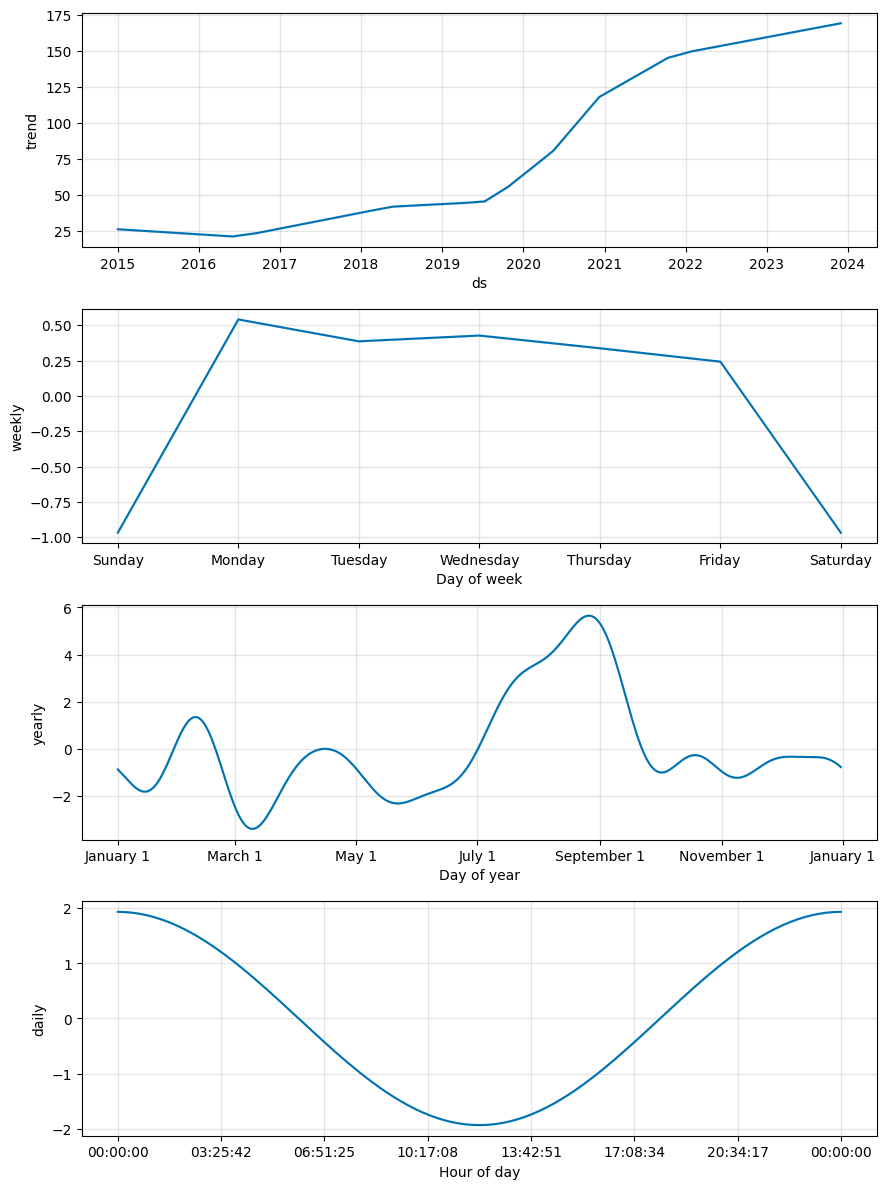

In [ ]:
fig2 = model_AAPL.plot_components(forecast)

- Analisando pontos de mudança

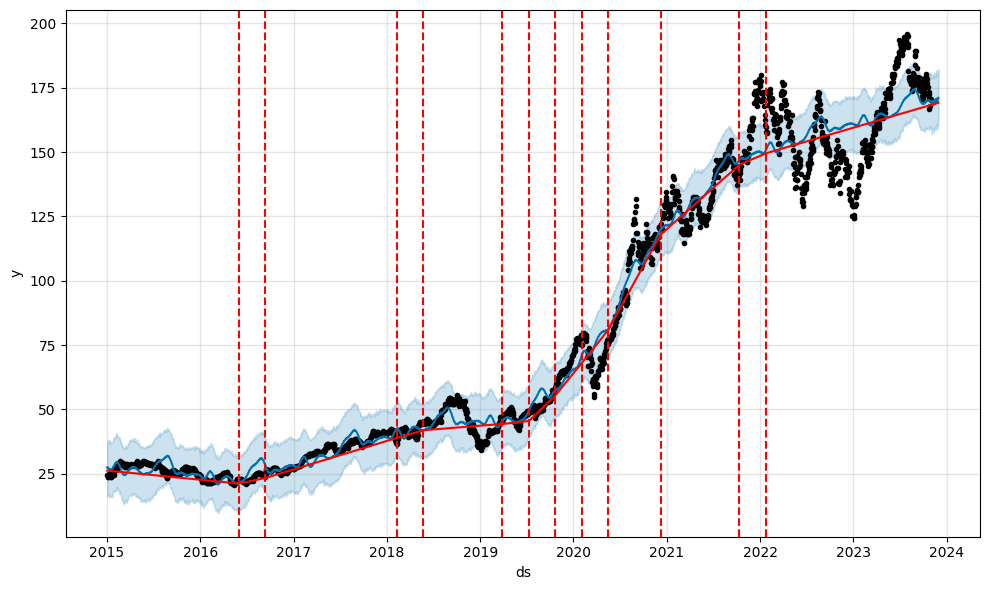

In [ ]:
from prophet.plot import add_changepoints_to_plot
fig = model_AAPL.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model_AAPL, forecast)

Apple - MSE, MSRE e MAE

In [ ]:
forecast_examination = forecast[(forecast['ds'] > '2023-10-31') & (forecast['ds'] <= test['Date'].iloc[-1])]['trend']

print(f"MSE da previsão: {MSE(test_examination['Adj Close']['AAPL'], forecast_examination)}")
print(f"MSRE da previsão: {MSRE(test_examination['Adj Close']['AAPL'], forecast_examination)}")
print(f"MAE da previsão: {MAE(test_examination['Adj Close']['AAPL'], forecast_examination)}")

MSE da previsão: 214.77354915690927
MSRE da previsão: 14.65515435459174
MAE da previsão: 11.63419208526033


#### AMAZON

In [ ]:
data_adj_close_and_date = data_adj_close_and_date.rename(columns={"y":"y_AAPL","y_AMZN":"y"})

In [ ]:
data_adj_close_and_date.head()

Price,ds,y_AAPL,y,y_GOOGL,y_META,y_MSFT,y_NVDA,y_TSLA
Ticker,,,,,,,,
0,2015-01-02,24.466452,15.4260,26.477501,78.449997,40.452744,4.832806,14.620667
1,2015-01-05,23.777193,15.1095,25.973000,77.190002,40.080742,4.751178,14.006000
2,2015-01-06,23.779427,14.7645,25.332001,76.150002,39.492466,4.607132,14.085333
3,2015-01-07,24.112869,14.9210,25.257500,76.150002,39.994236,4.595127,14.063333
4,2015-01-08,25.039335,15.0230,25.345501,78.180000,41.170784,4.767984,14.041333


In [ ]:
model_AMZN = Prophet()
model_AMZN.add_seasonality(name='daily', period=1, fourier_order=1)  # Adicione sazonalidade diária se necessário
model_AMZN.fit(data_adj_close_and_date[['ds', 'y']])


INFO:prophet:Found custom seasonality named 'daily', disabling built-in 'daily' seasonality.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf0ccrzj5/4o10wj9k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf0ccrzj5/gv05804v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65871', 'data', 'file=/tmp/tmpf0ccrzj5/4o10wj9k.json', 'init=/tmp/tmpf0ccrzj5/gv05804v.json', 'output', 'file=/tmp/tmpf0ccrzj5/prophet_model3kjl49ni/prophet_model-20240129205623.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:56:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:56:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
forecast = model_AMZN.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2248,2023-11-26,96.745318,81.896966,111.811726
2249,2023-11-27,97.524148,83.610506,111.700104
2250,2023-11-28,97.341454,83.157646,110.618412
2251,2023-11-29,97.250275,82.464559,111.396043
2252,2023-11-30,97.091728,83.032887,109.451780


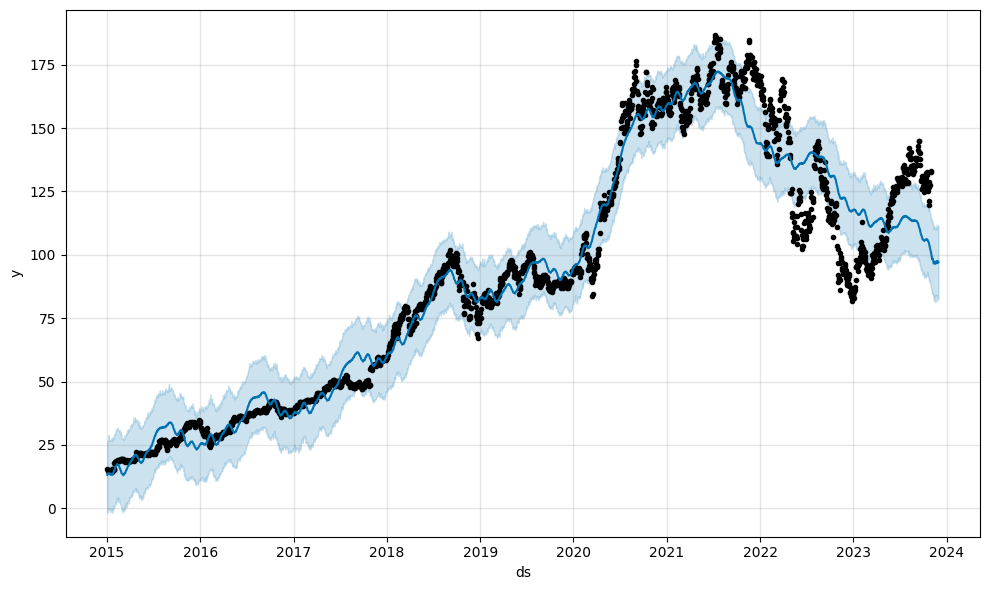

In [ ]:
fig = model_AMZN.plot(forecast)

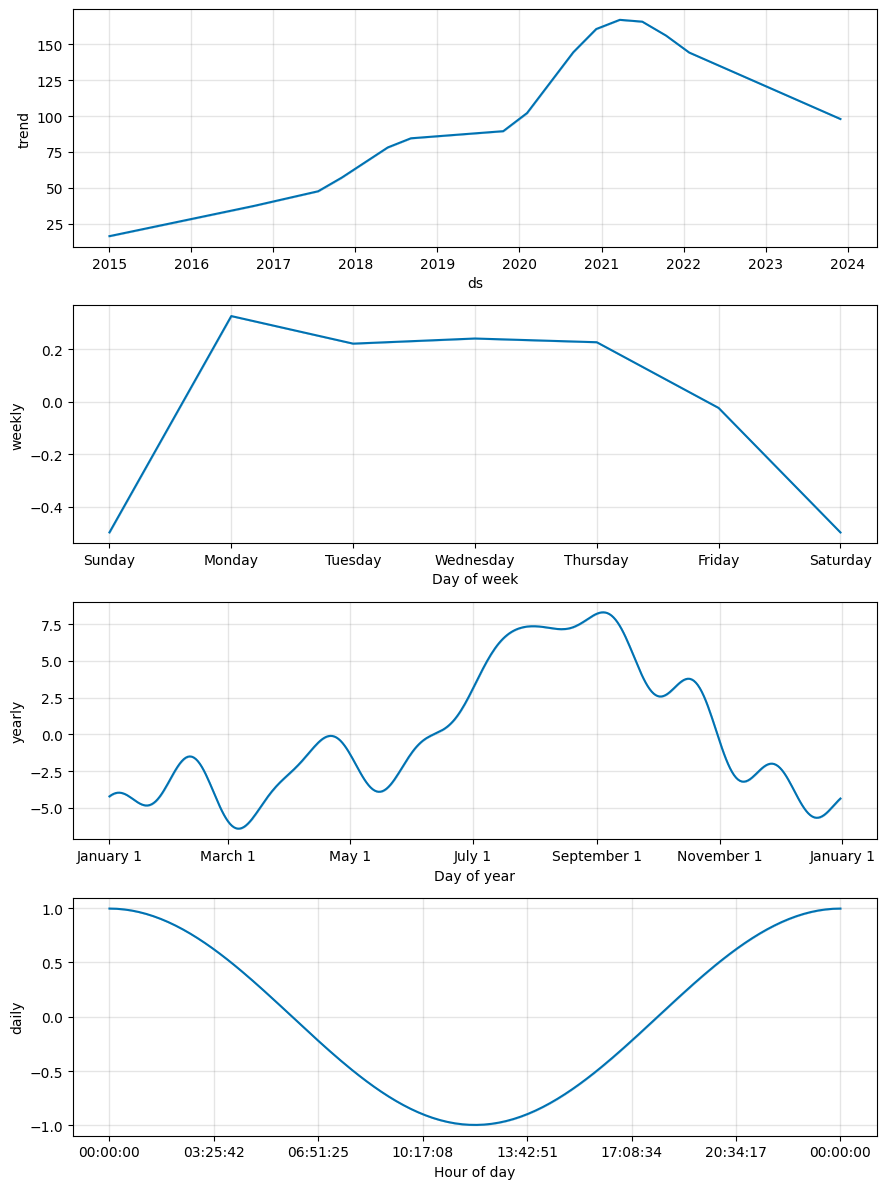

In [ ]:
fig2 = model_AMZN.plot_components(forecast)

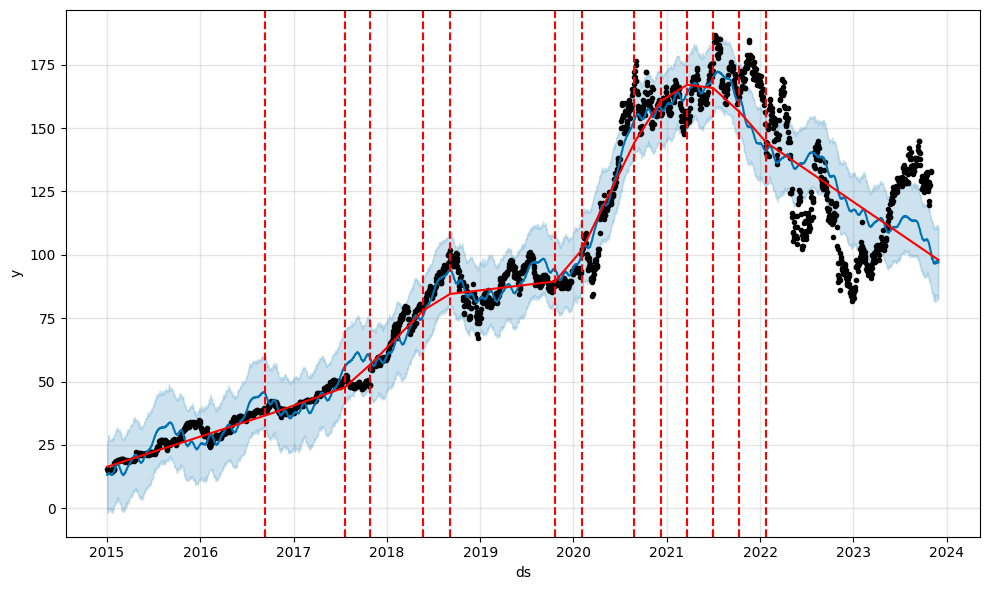

In [ ]:
from prophet.plot import add_changepoints_to_plot
fig = model_AMZN.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model_AMZN, forecast)

### Amazon - MRE, MSRE e MAE

In [ ]:
forecast_examination = forecast[(forecast['ds'] > '2023-10-31') & (forecast['ds'] <= test['Date'].iloc[-1])]['trend']

print(f"MSE da previsão: {MSE(test_examination['Adj Close']['AAPL'], forecast_examination)}")
print(f"MSRE da previsão: {MSRE(test_examination['Adj Close']['AAPL'], forecast_examination)}")
print(f"MAE da previsão: {MAE(test_examination['Adj Close']['AAPL'], forecast_examination)}")

MSE da previsão: 5190.378282104005
MSRE da previsão: 72.04428000961634
MAE da previsão: 59.689298115950045


#### GOOGLE


In [ ]:
data_adj_close_and_date = data_adj_close_and_date.rename(columns={"y":"y_AMZN","y_GOOGL":"y"})

In [ ]:
data_adj_close_and_date.head()

Price,ds,y_AAPL,y_AMZN,y,y_META,y_MSFT,y_NVDA,y_TSLA
Ticker,,,,,,,,
0,2015-01-02,24.466452,15.4260,26.477501,78.449997,40.452744,4.832806,14.620667
1,2015-01-05,23.777193,15.1095,25.973000,77.190002,40.080742,4.751178,14.006000
2,2015-01-06,23.779427,14.7645,25.332001,76.150002,39.492466,4.607132,14.085333
3,2015-01-07,24.112869,14.9210,25.257500,76.150002,39.994236,4.595127,14.063333
4,2015-01-08,25.039335,15.0230,25.345501,78.180000,41.170784,4.767984,14.041333


In [ ]:
model_GOOGL = Prophet()
model_GOOGL.add_seasonality(name='daily', period=1, fourier_order=1)  # Adicione sazonalidade diária se necessário
model_GOOGL.fit(data_adj_close_and_date[['ds', 'y']])

INFO:prophet:Found custom seasonality named 'daily', disabling built-in 'daily' seasonality.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf0ccrzj5/mwj5af0_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf0ccrzj5/nftfpjd7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14101', 'data', 'file=/tmp/tmpf0ccrzj5/mwj5af0_.json', 'init=/tmp/tmpf0ccrzj5/nftfpjd7.json', 'output', 'file=/tmp/tmpf0ccrzj5/prophet_modelqkm0neav/prophet_model-20240129205632.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:56:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:56:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
forecast = model_GOOGL.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2248,2023-11-26,106.678571,94.817193,117.164263
2249,2023-11-27,106.791919,95.343747,116.866630
2250,2023-11-28,106.593771,95.725930,118.515440
2251,2023-11-29,106.581592,95.092997,117.498197
2252,2023-11-30,106.565235,95.188580,116.905933


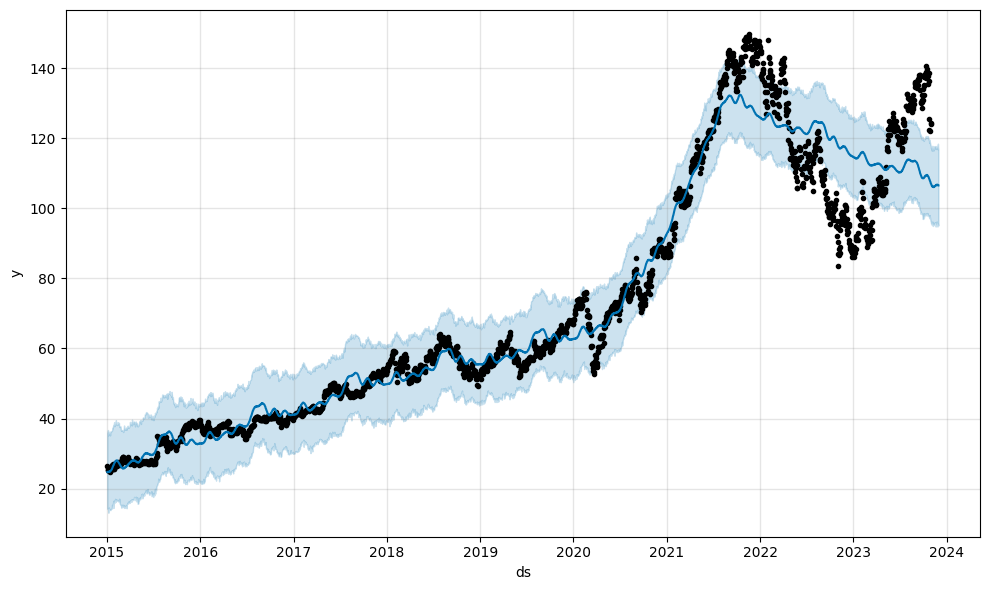

In [ ]:
fig = model_GOOGL.plot(forecast)

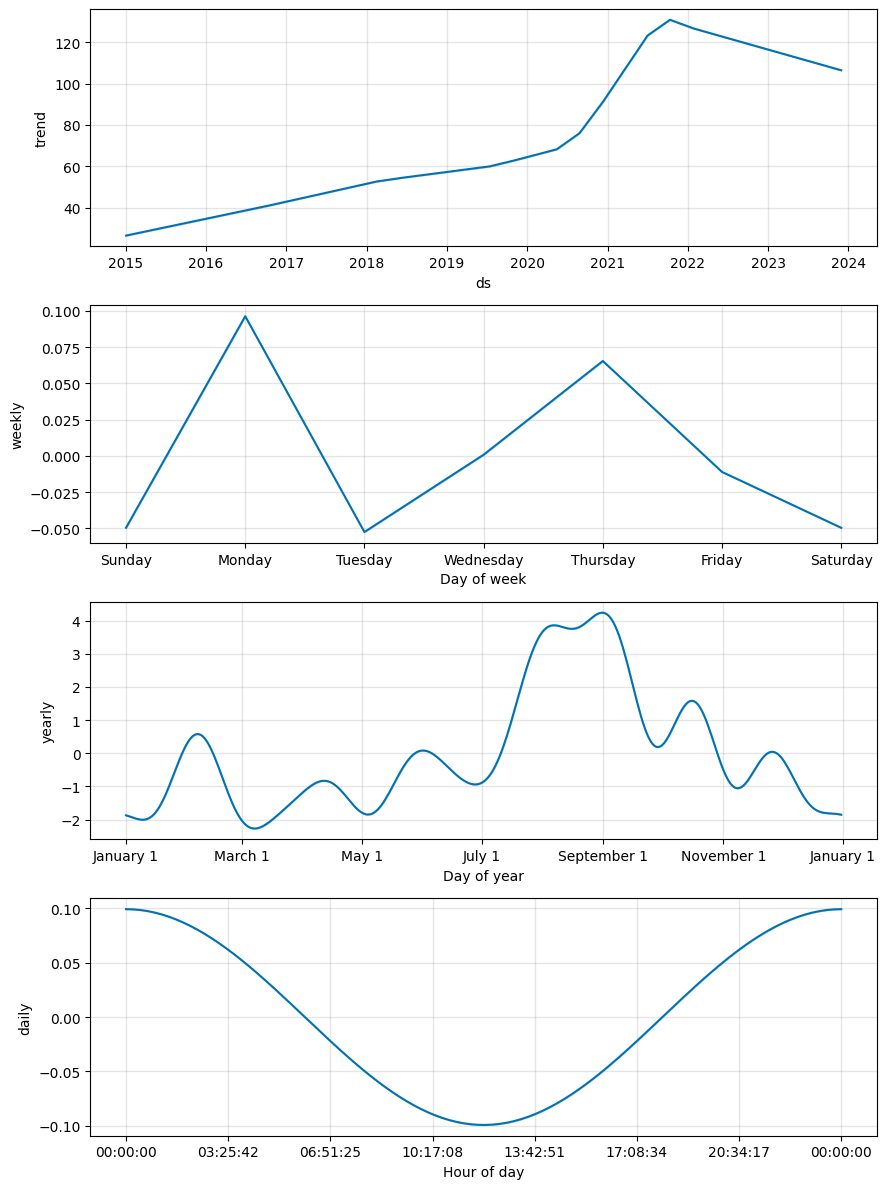

In [ ]:
fig2 = model_GOOGL.plot_components(forecast)

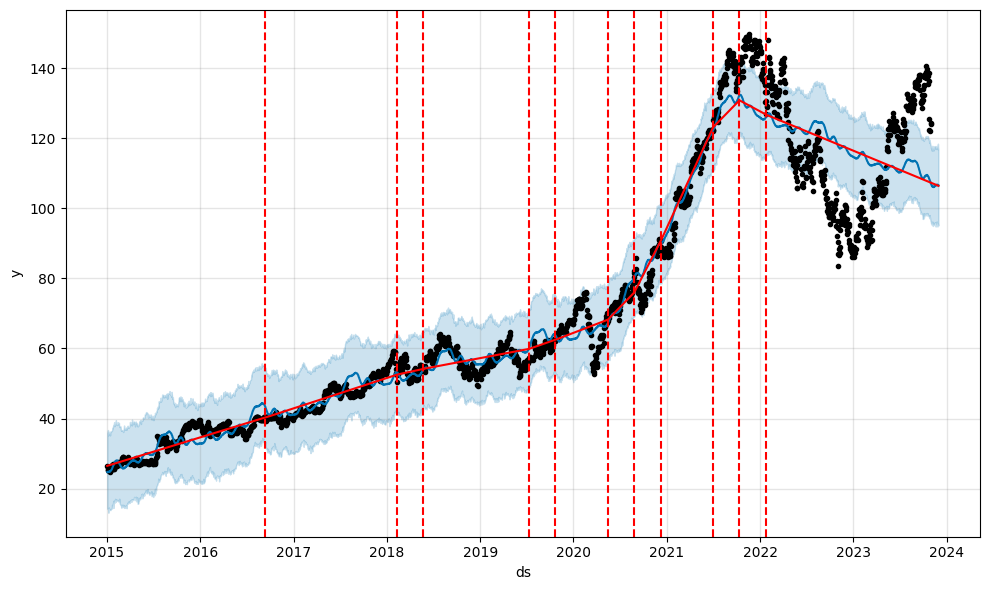

In [ ]:
from prophet.plot import add_changepoints_to_plot
fig = model_GOOGL.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model_GOOGL, forecast)

### Google - MSE, MSRE e MAE

In [ ]:
forecast_examination = forecast[(forecast['ds'] > '2023-10-31') & (forecast['ds'] <= test['Date'].iloc[-1])]['trend']

print(f"MSE da previsão: {MSE(test_examination['Adj Close']['AAPL'], forecast_examination)}")
print(f"MSRE da previsão: {MSRE(test_examination['Adj Close']['AAPL'], forecast_examination)}")
print(f"MAE da previsão: {MAE(test_examination['Adj Close']['AAPL'], forecast_examination)}")

MSE da previsão: 4289.620989632849
MSRE da previsão: 65.49519821813541
MAE da previsão: 54.251809061117086


#### META

In [ ]:
data_adj_close_and_date = data_adj_close_and_date.rename(columns={"y":"y_GOOGL","y_META":"y"})

In [ ]:
model_META = Prophet()
model_META.add_seasonality(name='daily', period=1, fourier_order=1)  # Adicione sazonalidade diária se necessário
model_META.fit(data_adj_close_and_date[['ds', 'y']])

INFO:prophet:Found custom seasonality named 'daily', disabling built-in 'daily' seasonality.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf0ccrzj5/5u8f_w_v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf0ccrzj5/2kp_21p7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46118', 'data', 'file=/tmp/tmpf0ccrzj5/5u8f_w_v.json', 'init=/tmp/tmpf0ccrzj5/2kp_21p7.json', 'output', 'file=/tmp/tmpf0ccrzj5/prophet_model54c0f2b0/prophet_model-20240129205638.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:56:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:56:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
forecast = model_META.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2248,2023-11-26,217.843219,173.238155,263.028102
2249,2023-11-27,216.739936,172.458368,260.979698
2250,2023-11-28,216.272005,175.401958,262.773403
2251,2023-11-29,216.182245,173.503084,262.606481
2252,2023-11-30,216.087032,171.750204,262.824520


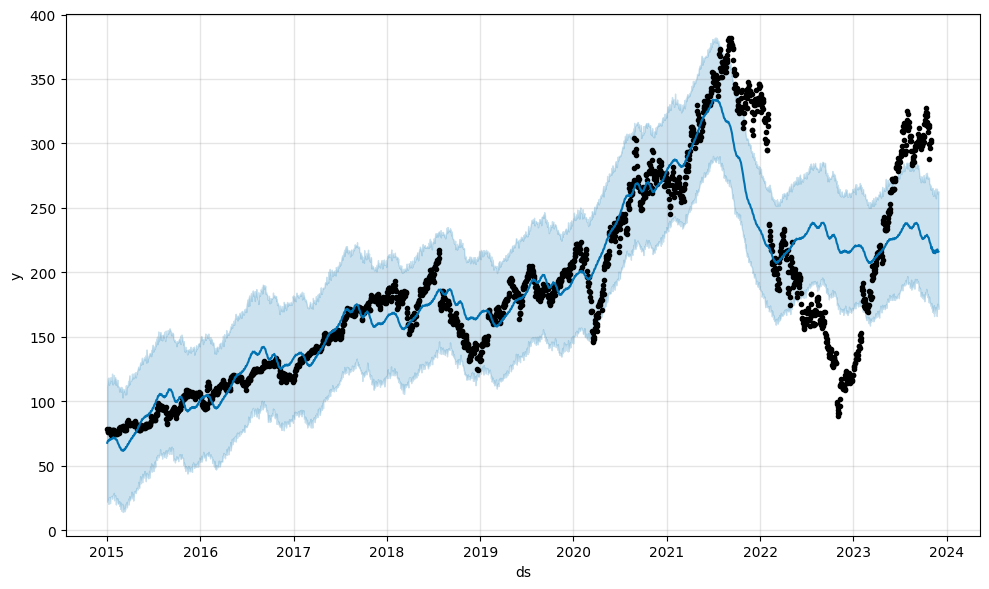

In [ ]:
fig = model_META.plot(forecast)

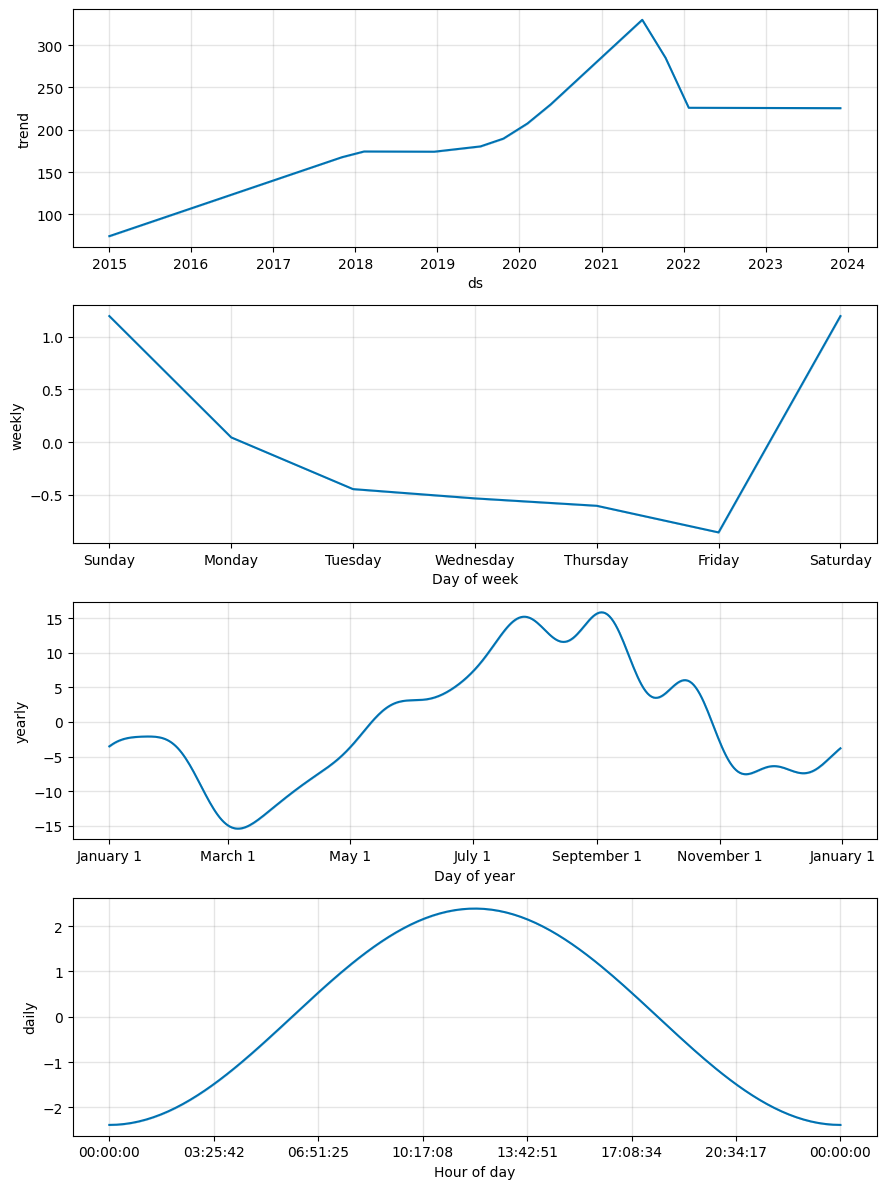

In [ ]:
fig2 = model_META.plot_components(forecast)

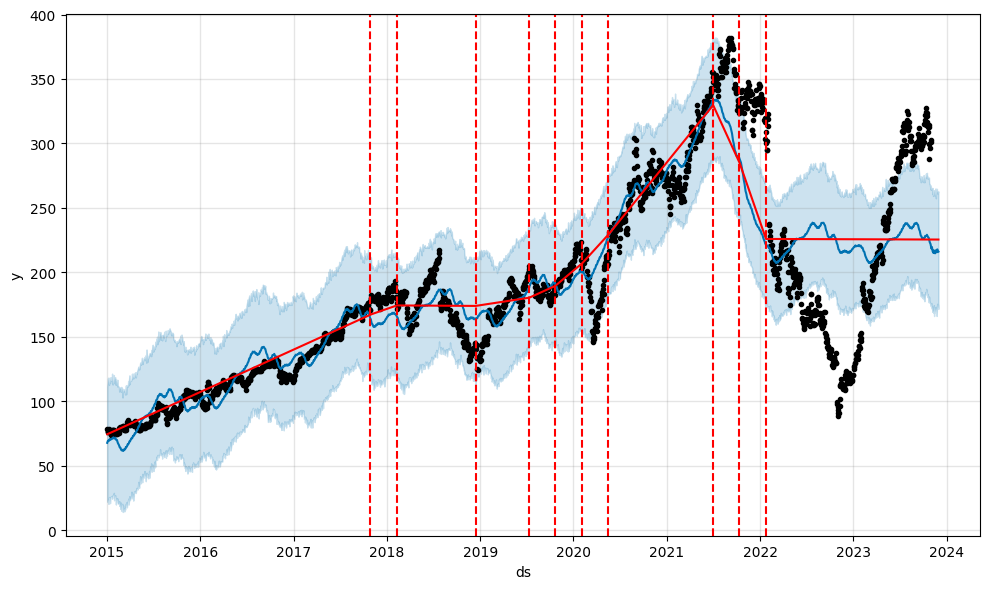

In [ ]:
from prophet.plot import add_changepoints_to_plot
fig = model_META.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model_META, forecast)

Meta - MSE, MSRE e MAE

In [ ]:
forecast_examination = forecast[(forecast['ds'] > '2023-10-31') & (forecast['ds'] <= test['Date'].iloc[-1])]['trend']

print(f"MSE da previsão: {MSE(test_examination['Adj Close']['AAPL'], forecast_examination)}")
print(f"MSRE da previsão: {MSRE(test_examination['Adj Close']['AAPL'], forecast_examination)}")
print(f"MAE da previsão: {MAE(test_examination['Adj Close']['AAPL'], forecast_examination)}")

MSE da previsão: 1118.1668648550096
MSRE da previsão: 33.439002151006385
MAE da previsão: 27.518004045383286


#### MICROSOFT

In [ ]:
data_adj_close_and_date = data_adj_close_and_date.rename(columns={"y":"y_META","y_MSFT":"y"})

In [ ]:
data_adj_close_and_date.head()

Price,ds,y_AAPL,y_AMZN,y_GOOGL,y_META,y,y_NVDA,y_TSLA
Ticker,,,,,,,,
0,2015-01-02,24.466452,15.4260,26.477501,78.449997,40.452744,4.832806,14.620667
1,2015-01-05,23.777193,15.1095,25.973000,77.190002,40.080742,4.751178,14.006000
2,2015-01-06,23.779427,14.7645,25.332001,76.150002,39.492466,4.607132,14.085333
3,2015-01-07,24.112869,14.9210,25.257500,76.150002,39.994236,4.595127,14.063333
4,2015-01-08,25.039335,15.0230,25.345501,78.180000,41.170784,4.767984,14.041333


In [ ]:
model_MSFT= Prophet()
model_MSFT.add_seasonality(name='daily', period=1, fourier_order=1)  # Adicione sazonalidade diária se necessário
model_MSFT.fit(data_adj_close_and_date[['ds', 'y']])

INFO:prophet:Found custom seasonality named 'daily', disabling built-in 'daily' seasonality.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf0ccrzj5/k9mi0bh8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf0ccrzj5/4dh_g02c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35465', 'data', 'file=/tmp/tmpf0ccrzj5/k9mi0bh8.json', 'init=/tmp/tmpf0ccrzj5/4dh_g02c.json', 'output', 'file=/tmp/tmpf0ccrzj5/prophet_modelwt_ae89g/prophet_model-20240129205642.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:56:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:56:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
forecast = model_MSFT.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2248,2023-11-26,299.699706,277.659598,322.689935
2249,2023-11-27,298.736943,276.384233,320.454647
2250,2023-11-28,298.405453,275.621060,320.477902
2251,2023-11-29,298.571163,275.392841,318.396292
2252,2023-11-30,298.598350,276.316542,322.041142


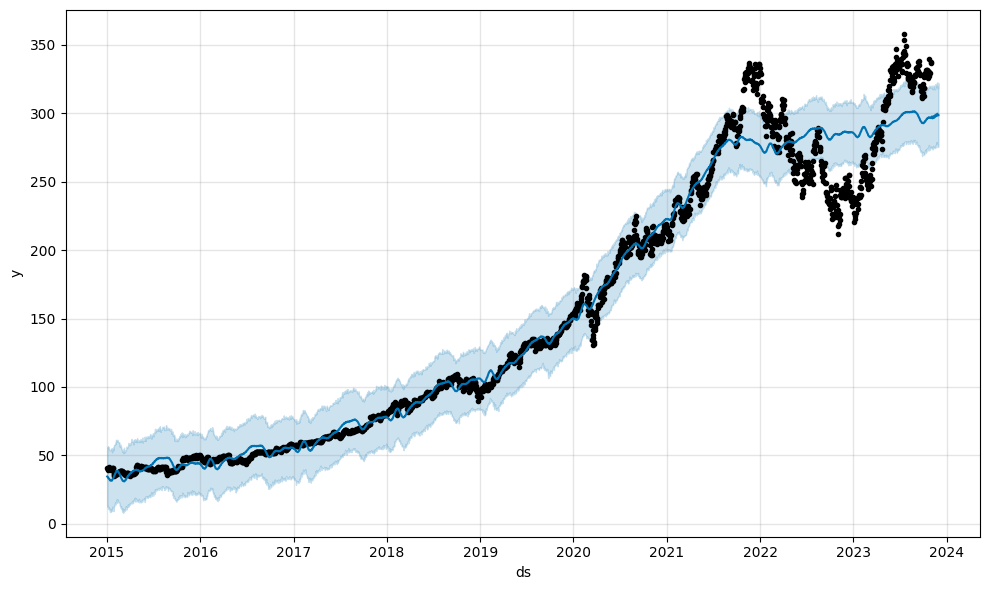

In [ ]:
fig =model_MSFT.plot(forecast)

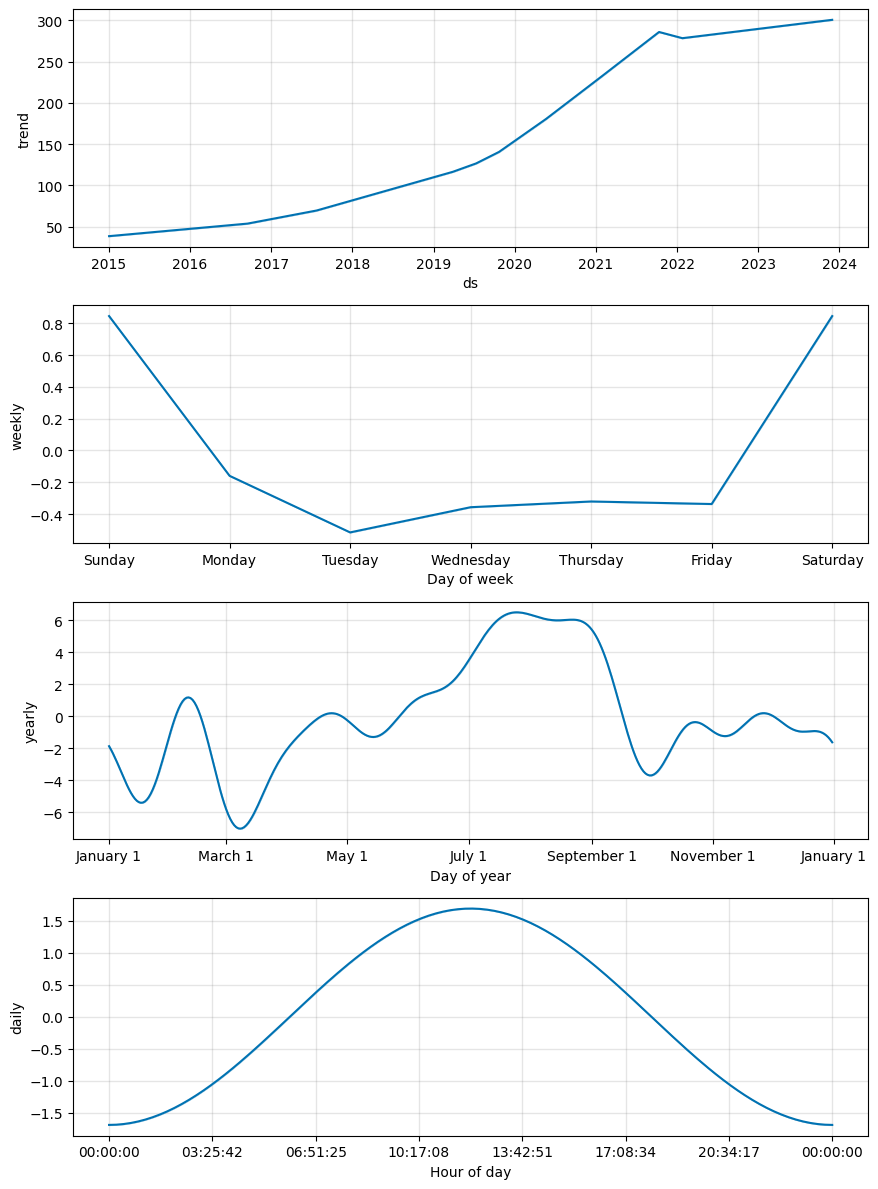

In [ ]:
fig2 = model_MSFT.plot_components(forecast)

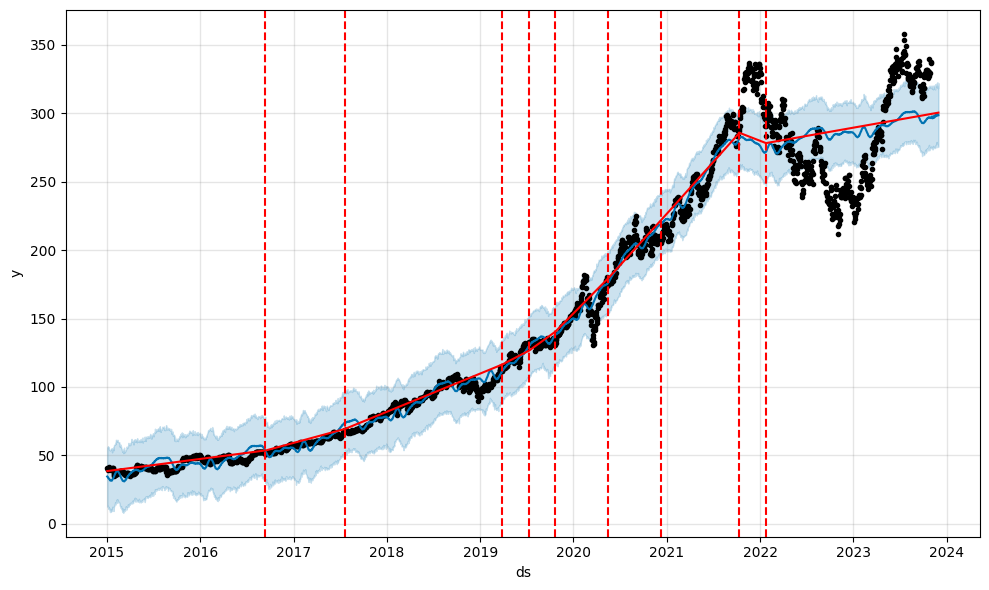

In [ ]:
from prophet.plot import add_changepoints_to_plot
fig = model_MSFT.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model_MSFT, forecast)

### Microsoft - MSE, MSRE e MAE

In [ ]:
forecast_examination = forecast[(forecast['ds'] > '2023-10-31') & (forecast['ds'] <= test['Date'].iloc[-1])]['trend']

print(f"MSE da previsão: {MSE(test_examination['Adj Close']['AAPL'], forecast_examination)}")
print(f"MSRE da previsão: {MSRE(test_examination['Adj Close']['AAPL'], forecast_examination)}")
print(f"MAE da previsão: {MAE(test_examination['Adj Close']['AAPL'], forecast_examination)}")

MSE da previsão: 9041.000029247627
MSRE da previsão: 95.08417338993712
MAE da previsão: 78.88315974394986


#### NVIDIA

In [ ]:
data_adj_close_and_date = data_adj_close_and_date.rename(columns={"y":"y_MSFT","y_NVDA":"y"})

In [ ]:
model_NVDA= Prophet()
model_NVDA.add_seasonality(name='daily', period=1, fourier_order=1)  # Adicione sazonalidade diária se necessário
model_NVDA.fit(data_adj_close_and_date[['ds', 'y']])

INFO:prophet:Found custom seasonality named 'daily', disabling built-in 'daily' seasonality.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf0ccrzj5/irxq0yqb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf0ccrzj5/6ei16nhv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94013', 'data', 'file=/tmp/tmpf0ccrzj5/irxq0yqb.json', 'init=/tmp/tmpf0ccrzj5/6ei16nhv.json', 'output', 'file=/tmp/tmpf0ccrzj5/prophet_model2hm2usi9/prophet_model-20240129205648.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:56:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:56:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
forecast = model_NVDA.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2248,2023-11-26,364.363101,308.370470,419.867124
2249,2023-11-27,362.533359,303.162360,418.505424
2250,2023-11-28,361.947818,306.955090,415.975546
2251,2023-11-29,361.842884,307.362299,411.241496
2252,2023-11-30,362.099709,302.233636,415.943028


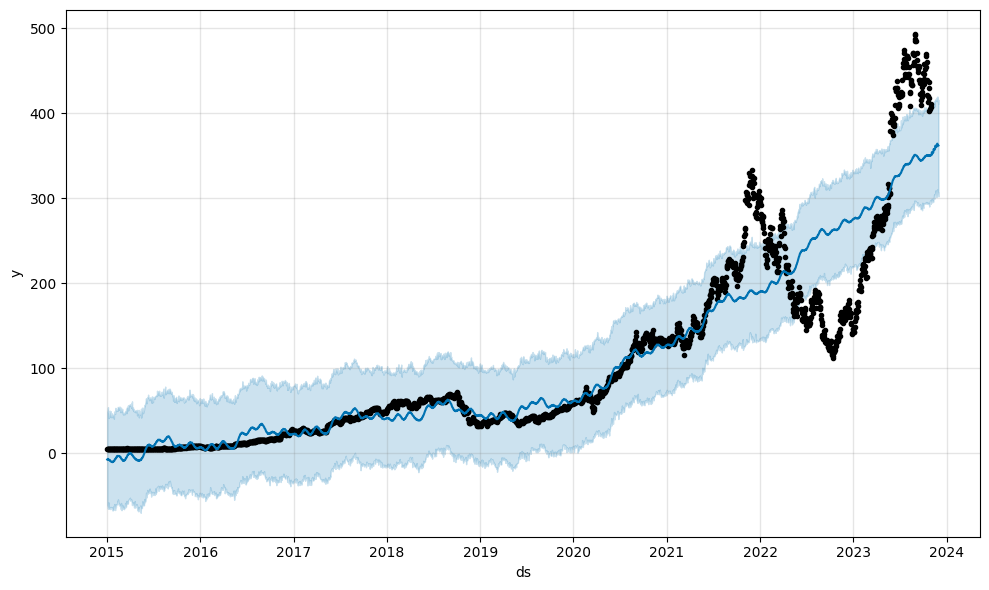

In [ ]:
fig = model_NVDA.plot(forecast)

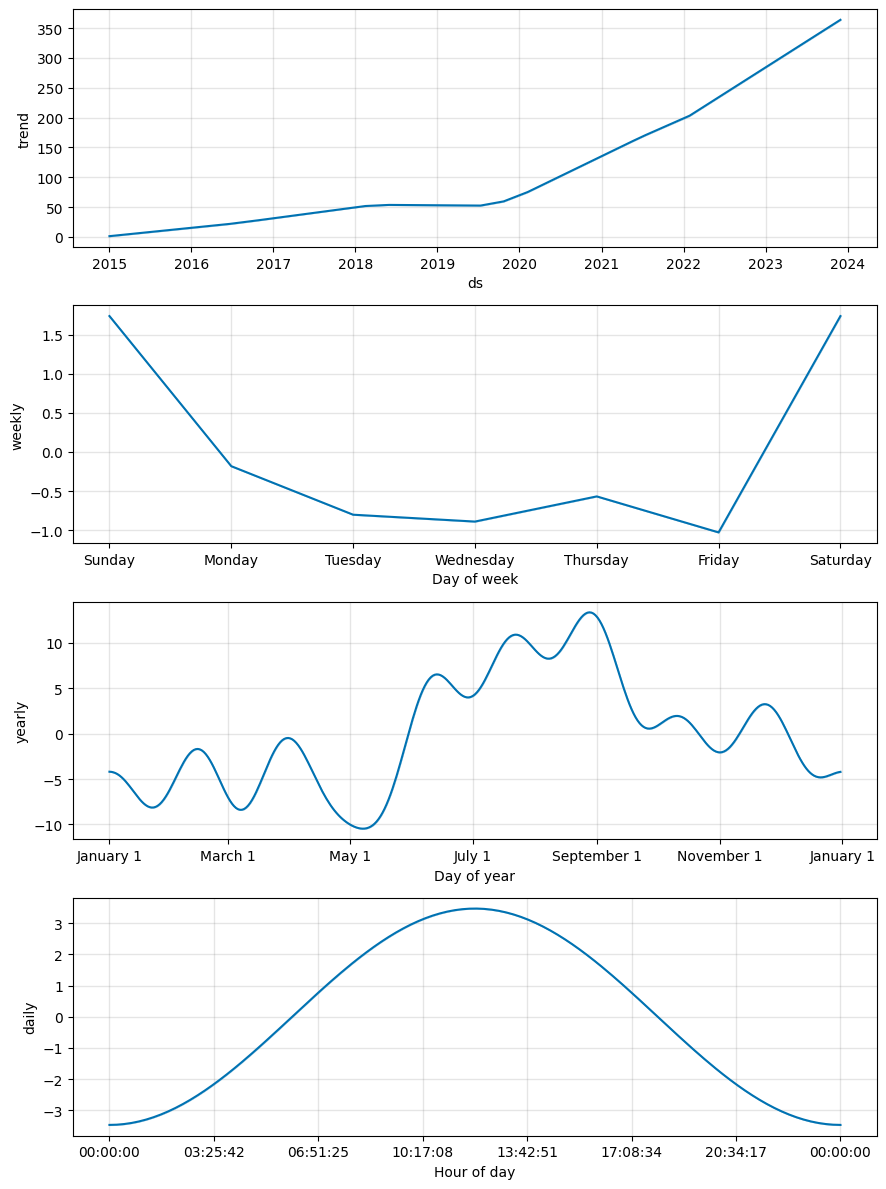

In [ ]:
fig2 = model_NVDA.plot_components(forecast)

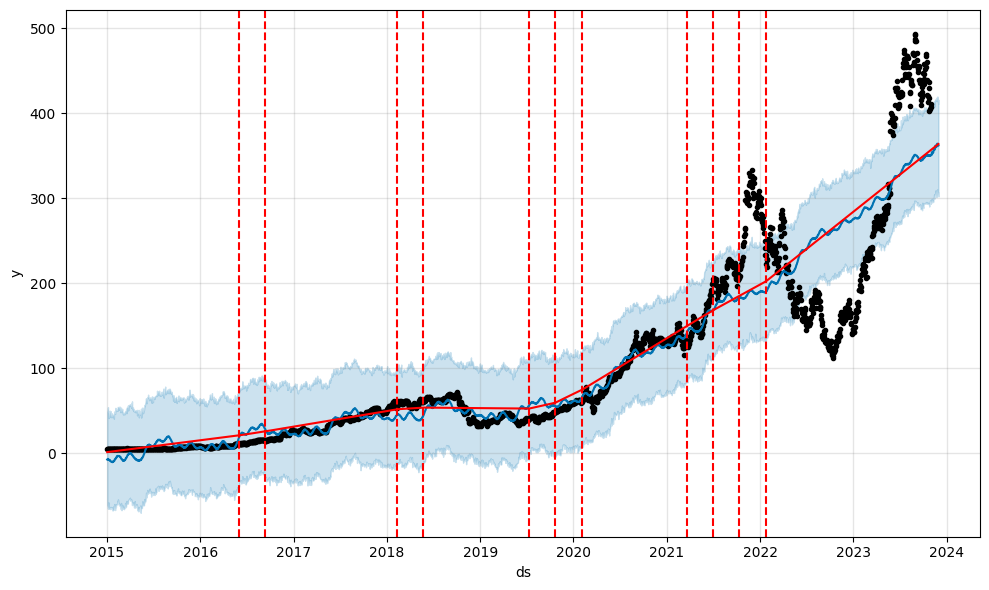

In [ ]:
from prophet.plot import add_changepoints_to_plot
fig = model_NVDA.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model_NVDA, forecast)

### Nvidia - MSE, MSRE e MAE

In [ ]:
forecast_examination = forecast[(forecast['ds'] > '2023-10-31') & (forecast['ds'] <= test['Date'].iloc[-1])]['trend']

print(f"MSE da previsão: {MSE(test_examination['Adj Close']['AAPL'], forecast_examination)}")
print(f"MSRE da previsão: {MSRE(test_examination['Adj Close']['AAPL'], forecast_examination)}")
print(f"MAE da previsão: {MAE(test_examination['Adj Close']['AAPL'], forecast_examination)}")

MSE da previsão: 21049.74820326518
MSRE da previsão: 145.085313534021
MAE da previsão: 120.46002346023927


#### TESLA

In [ ]:
data_adj_close_and_date = data_adj_close_and_date.rename(columns={"y":"y_NVDA","y_TSLA":"y"})

In [ ]:
model_TSLA= Prophet()
model_TSLA.add_seasonality(name='daily', period=1, fourier_order=1)  # Adicione sazonalidade diária se necessário
model_TSLA.fit(data_adj_close_and_date[['ds', 'y']])

INFO:prophet:Found custom seasonality named 'daily', disabling built-in 'daily' seasonality.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf0ccrzj5/sy6_wiuh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf0ccrzj5/6oj8ezgt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23812', 'data', 'file=/tmp/tmpf0ccrzj5/sy6_wiuh.json', 'init=/tmp/tmpf0ccrzj5/6oj8ezgt.json', 'output', 'file=/tmp/tmpf0ccrzj5/prophet_modelisvrodbq/prophet_model-20240129205651.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:56:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:56:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
forecast = model_TSLA.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2248,2023-11-26,189.299369,150.649512,225.325890
2249,2023-11-27,190.051181,152.697189,225.978156
2250,2023-11-28,189.116950,151.688273,226.479999
2251,2023-11-29,189.284761,154.438920,224.969496
2252,2023-11-30,188.763933,152.867486,224.043383


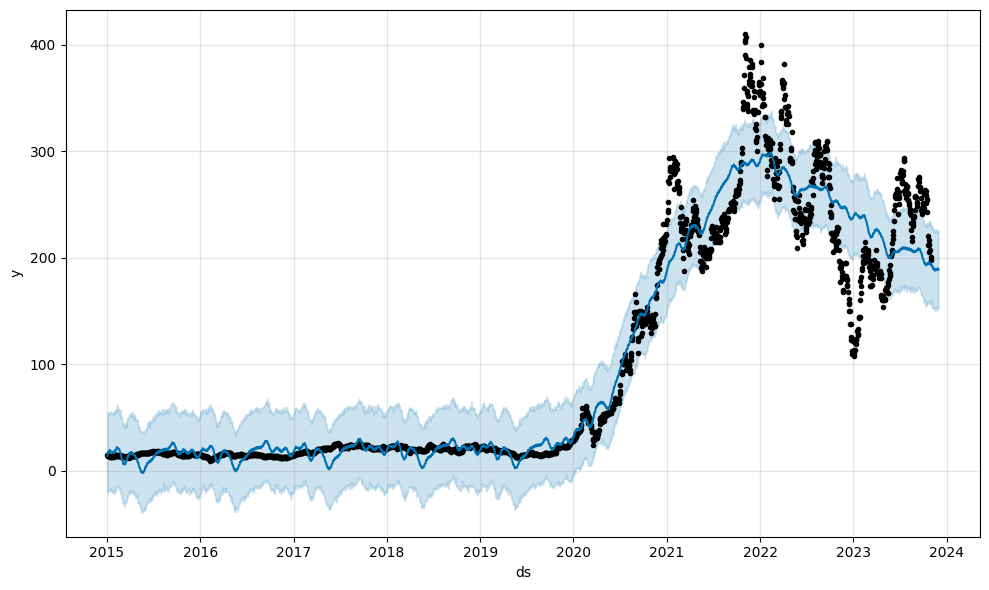

In [ ]:
fig = model_TSLA.plot(forecast)

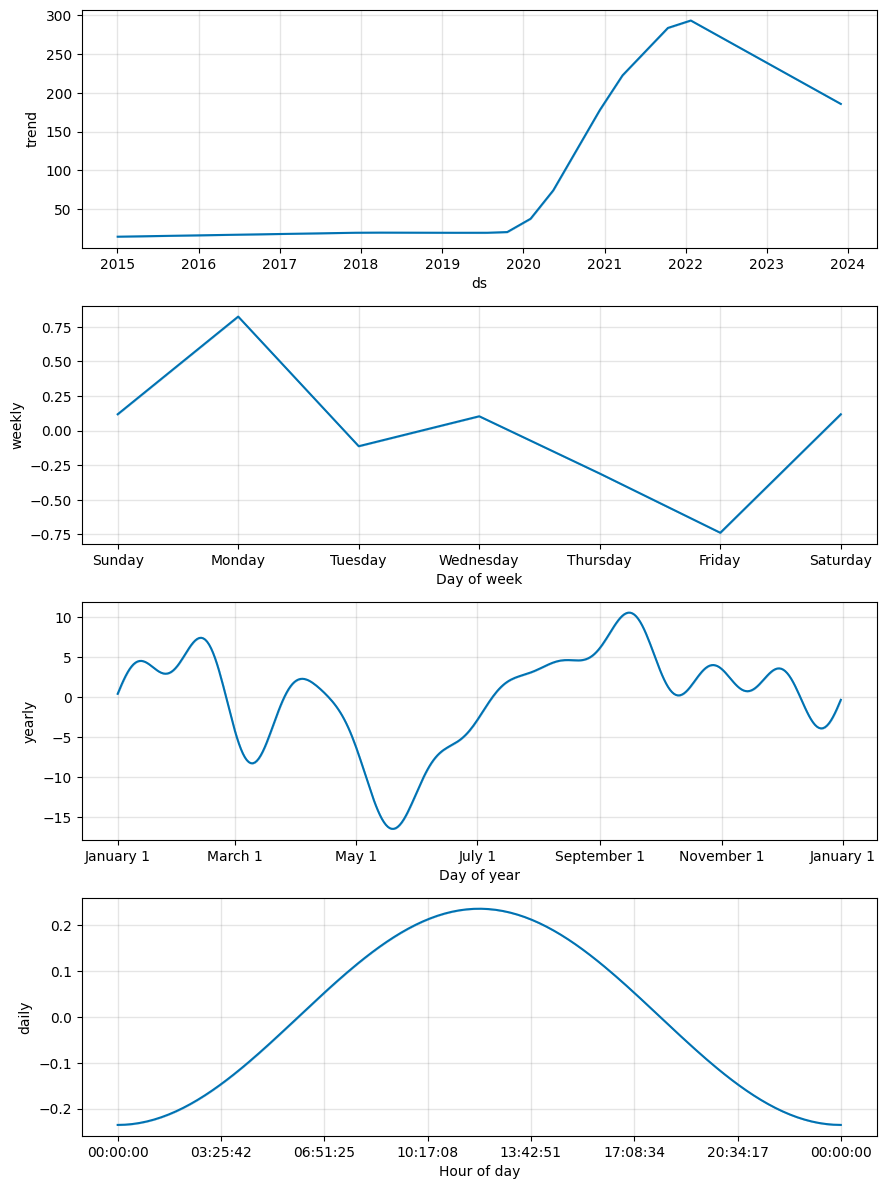

In [ ]:
fig2 = model_TSLA.plot_components(forecast)

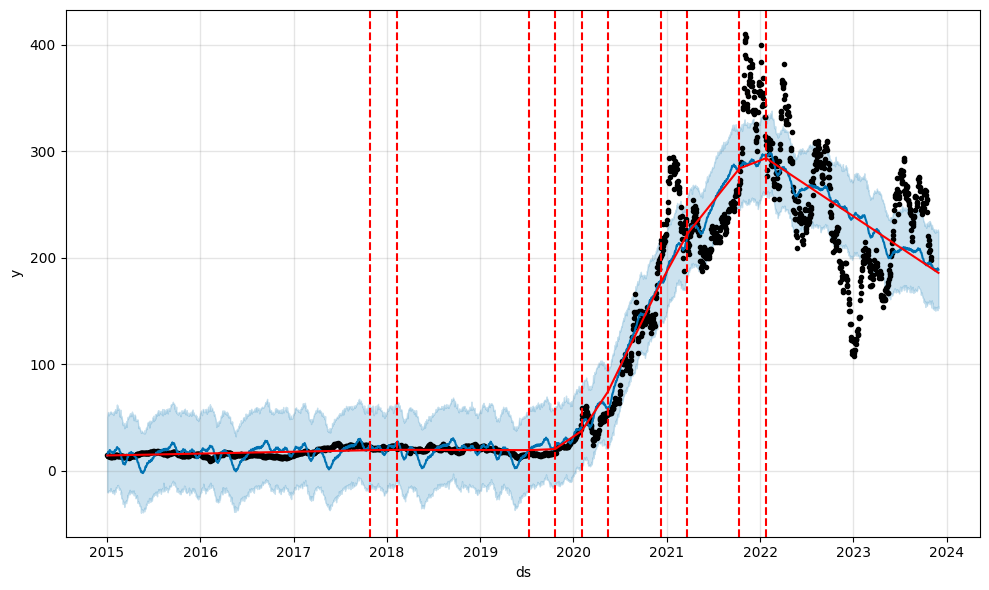

In [ ]:
from prophet.plot import add_changepoints_to_plot
fig = model_TSLA.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model_TSLA, forecast)

### Tesla - MSE, MSRE e MAE

In [ ]:
forecast_examination = forecast[(forecast['ds'] > '2023-10-31') & (forecast['ds'] <= test['Date'].iloc[-1])]['trend']

print(f"MSE da previsão: {MSE(test_examination['Adj Close']['AAPL'], forecast_examination)}")
print(f"MSRE da previsão: {MSRE(test_examination['Adj Close']['AAPL'], forecast_examination)}")
print(f"MAE da previsão: {MAE(test_examination['Adj Close']['AAPL'], forecast_examination)}")

MSE da previsão: 35.145508238617225
MSRE da previsão: 5.928364718758219
MAE da previsão: 3.87262659856687


## Esboço efeito "BadNews" usando  Holidays

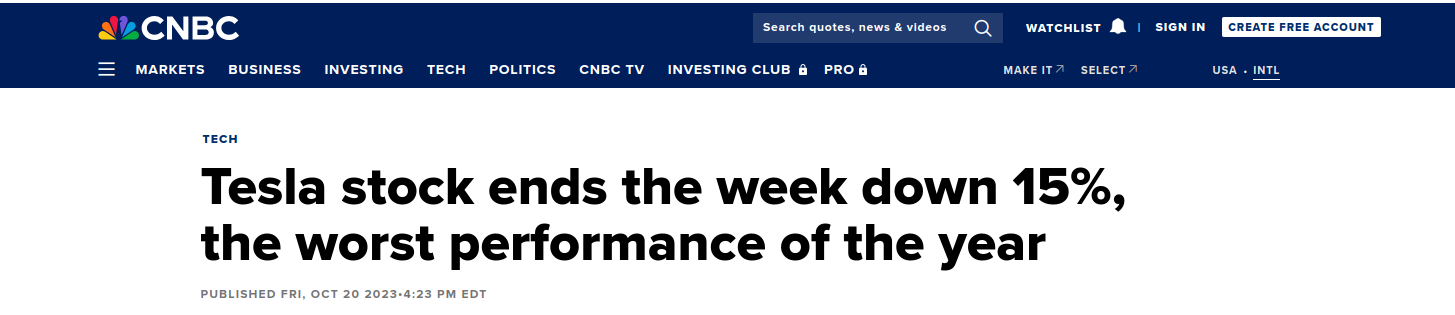

#### Objetivos :

Quero tentar precificar a reação do mercado a uma determinada ação com uma notícia ruim , nesse exemplo na semana do 20 de outubro desse ano as ações da tesla caíram mais de 15% , portanto irei setar manualmente essa semana como um holiday e ver as mudanças nas previsões e componentes da série temporal .

INFO:prophet:Found custom seasonality named 'daily', disabling built-in 'daily' seasonality.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf0ccrzj5/569mtp97.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf0ccrzj5/cn6002yd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20462', 'data', 'file=/tmp/tmpf0ccrzj5/569mtp97.json', 'init=/tmp/tmpf0ccrzj5/cn6002yd.json', 'output', 'file=/tmp/tmpf0ccrzj5/prophet_modelnq4z63k9/prophet_model-20240129205657.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:56:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:56:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


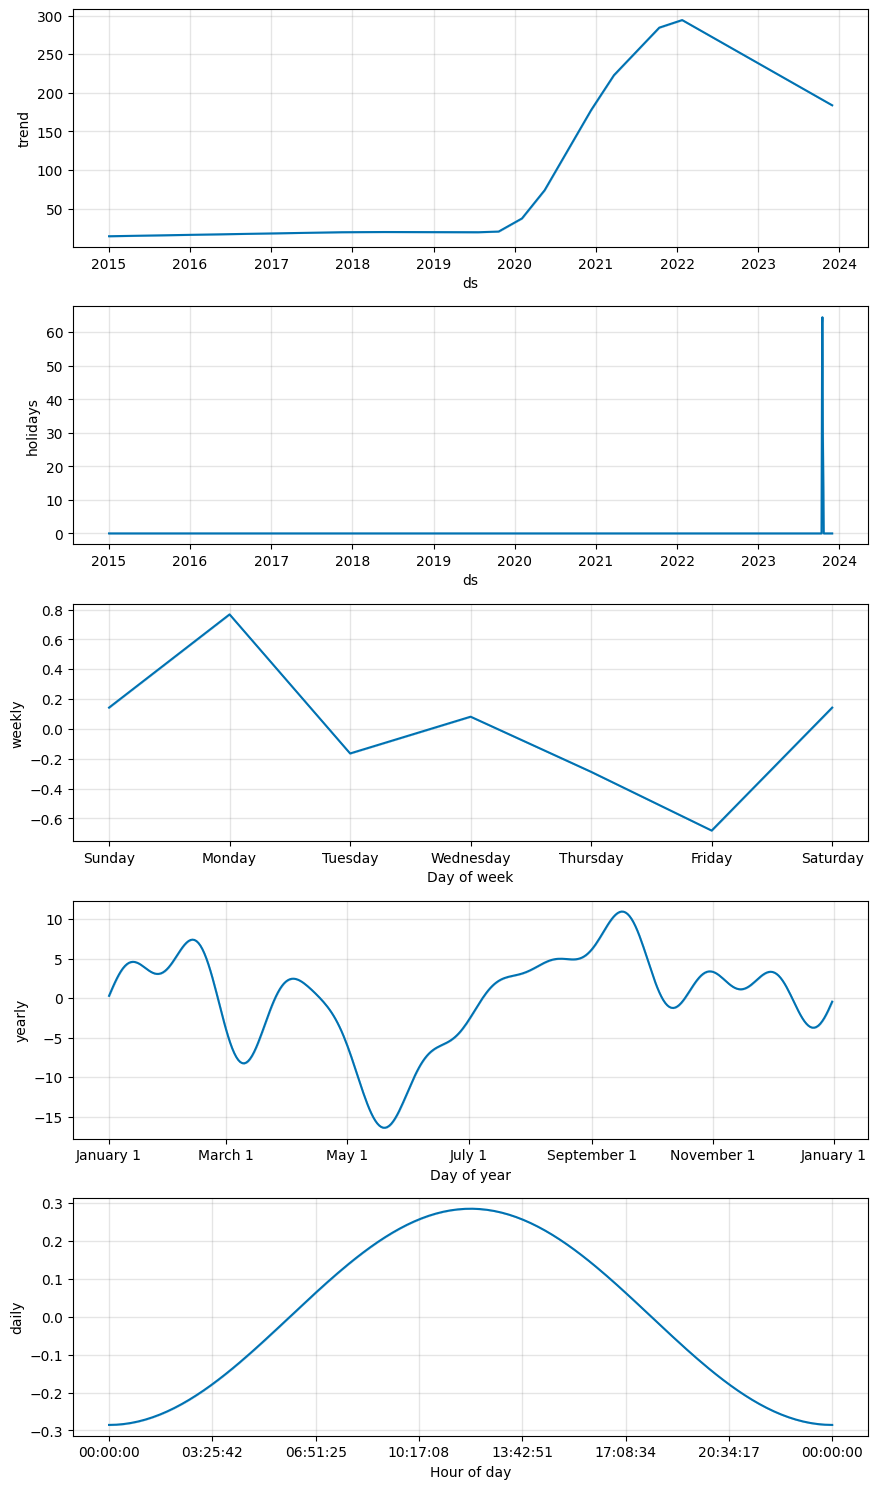

In [ ]:
# Criando um DataFrame de feriados para a data '2023-10-16'
feriado_semana = pd.DataFrame({
    'holiday': 'feriado_semana',
    'ds': pd.to_datetime(['2023-10-16']),
    'lower_window': 0,
    'upper_window': 6,
})

# Criando uma instância do modelo Prophet com a componente 'holidays'
model_TSLA = Prophet(holidays=feriado_semana)

# Adicionando uma sazonalidade diária (opcional)
model_TSLA.add_seasonality(name='daily', period=1, fourier_order=1)

# Ajustando o modelo aos dados
model_TSLA.fit(data_adj_close_and_date[['ds', 'y']])
forecast = model_TSLA.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
# Plotando os componentes, incluindo feriados
model_TSLA.plot_components(forecast)
plt.show()

In [ ]:
forecast_examination = forecast[(forecast['ds'] > '2023-10-31') & (forecast['ds'] <= test['Date'].iloc[-1])]['trend']

print(f"MSE da previsão: {MSE(test_examination['Adj Close']['AAPL'], forecast_examination)}")
print(f"MSRE da previsão: {MSRE(test_examination['Adj Close']['AAPL'], forecast_examination)}")
print(f"MAE da previsão: {MAE(test_examination['Adj Close']['AAPL'], forecast_examination)}")


MSE da previsão: 31.17371165422719
MSRE da previsão: 5.583342337187215
MAE da previsão: 3.9570043286841527


In [ ]:
feriados_incluidos = model_TSLA.holidays
print("Feriados incluídos no modelo:")
print(feriados_incluidos)

Feriados incluídos no modelo:
          holiday         ds  lower_window  upper_window
0  feriado_semana 2023-10-16             0             6
